<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E9%82%8F%E8%BC%AF%E8%BF%B4%E6%AD%B8/forge%E8%AA%AA%E6%98%8E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear models for classification
線性模型也廣泛用於分類。我們先來看看二元分類。在這種情況下，使用以下公式進行預測:
```
ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0
```
該公式看起來與線性迴歸公式非常相似，但不是僅僅返回特徵的加權和，這個公式看起來與線性迴歸公式非常相似，但我們不是僅僅返回特徵的加權和，而是將預測值門檻設為零。如果函數小於零，我們預測類別-1,如果它大於零，我們預測該類別為 +1。此預測規則對於所有分類線性模型都是通用的。同樣，有很多不同的方法來找到係數（w）和截距（b）。

對於迴歸的線性模型，輸出 ŷ 是特徵的線性函數：直線、平面或超平面（在更高維度中）。對於分類的線性模型，決策邊界是輸入的線性函數。換句話說，（二元）線性分類器是使用線、平面或超平面分離兩個類別的分類器。下面有提供參考範例


學習線性模型的算法有很多種，這些算法之間主要有兩個不同點：

1. 它們如何判斷某個參數組合（比如斜率 w 和截距 b）是否很好地擬合了訓練數據。
2. 它們是否使用正則化（一種防止模型過於複雜的技術），以及使用什麼類型的正則化。

對於第一點，每個算法用不同的方式來衡量「模型是否很好地擬合訓練數據」，這種衡量方式被稱為損失函數。簡單來說，損失函數就像一個評分標準，用來檢查模型的預測與實際數據的差距有多大。

你可能會希望通過調整參數 w 和 b，讓模型的錯誤分類（比如把貓分成了狗）數量降到最低。但因為數學上的限制，這麼做並不可行，也就是說，沒有一個簡單的方法能直接讓錯誤數量變成零。

不過，好消息是，在大多數情況下（包括我們現在的目的），選擇哪種損失函數（即第一點的不同衡量方式）對最終結果的影響其實很小。所以，雖然算法之間的損失函數不同，但這對我們來說通常不是什麼大問題。


兩種最常見的線性分類演算法是邏輯迴歸（在 linear_model.LogisticRegression 中實作）和線性支援向量機（線性 SVM），在 svm.LinearSVC 中實作（SVC 代表支援向量分類器）。儘管名字如此，LogisticRegression 是一種分類演算法，而不是回歸演算法，而且它不應與 LinearRegression 混淆。

⬇︎我們可以將邏輯迴歸和線性 SVM 模型應用於 Forge 資料集，並視覺化線性模型發現的決策邊界

In [1]:
%%capture
%pip install wget mglearn

In [2]:
import wget

wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont.ttf'

In [2]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager
fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")


### 使用真偽資料集


In [3]:
#使用表格檢驗資料集
import mglearn.datasets
import pandas as pd
#X的維度(26,2),代表有2個特徵,
# y的維度(26),內容為0和1,0是偽造,1是真
X, y = mglearn.datasets.make_forge()
#print(X.shape, y.shape)
print(y)

df = pd.DataFrame(X,columns=['特徵0','特徵1'])
df['真偽'] = y
df

[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


,特徵0,特徵1,真偽
0,9.963466,4.596765,1
1,11.032954,-0.168167,0
2,11.541558,5.211161,1
3,8.692890,1.543220,0
4,8.106227,4.286960,0
5,8.309889,4.806240,1
6,11.930271,4.648663,1
7,9.672847,-0.202832,0
8,8.348103,5.134156,1
9,8.674947,4.475731,1


⬇︎使用mglearn畫圖

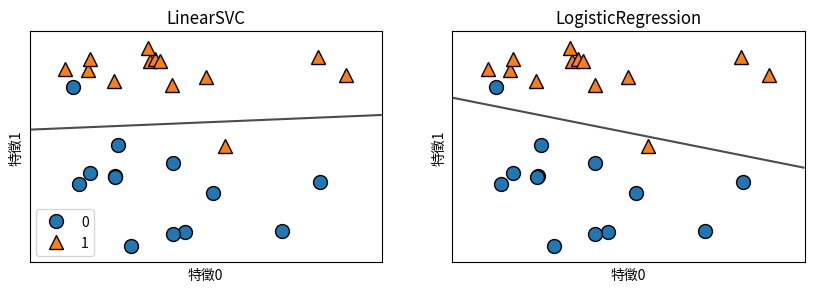

In [4]:
#使用圖表檢驗資料集
import mglearn.datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge() #使用真偽資料集

fig, axes = plt.subplots(1, 2, figsize = (10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    #X特徵,fill是否填色,alpha,線段的不透明度
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("特徵0")
    ax.set_ylabel("特徵1")
axes[0].legend()

⬇︎使用matplotlib畫圖

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

# 生成資料集
X,y = mglearn.datasets.make_forge()

# 創建子圖
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# 定義繪製決策邊界的函數
def plot_decision_boundary(model, X, y, ax):
    # 創建網格點,參考機器學習繪圖
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))
    
    # 預測網格點的類別
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 繪製決策邊界
    ax.contour(xx, yy, Z, alpha=0.7)
    
    # 繪製散點圖
    ax.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='類別 0')
    ax.scatter(X[y==1, 0], X[y==1, 1], c='red', label='類別 1')
    
    ax.set_xlabel('特徵 0')
    ax.set_ylabel('特徵 1')
    ax.set_title(f'{model.__class__.__name__}')

# 訓練模型並繪製
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    model.fit(X, y)
    plot_decision_boundary(model, X, y, ax)

axes[0].legend()
plt.tight_layout()
plt.show() 

- Linear Regression的Ridge模型 的 alpha：越高，係數越接近 0，正則化越強。
- LogisticRegression/LinearSVC 的 C：越低，係數越接近 0，正則化越強。

## 2個預設都使用L2正規化(Ridge)
- 對於 LogisticRegression 和 LinearSVC，決定正規化強度的權衡參數稱為 C，C 值越高，正規化程度越低
- 當使用較高的參數 C 值時，LogisticRegression 和 LinearSVC 會盡可能地擬合訓練集，而當參數 C 值較低時，模型會更重視尋找接近零的係數向量 (w)。
- 使用較低的C值將導致演算法嘗試適應「大多數」資料點，而使用較高的 C 值會強調對每個單獨的資料點進行分類的重要性。
正確配置。

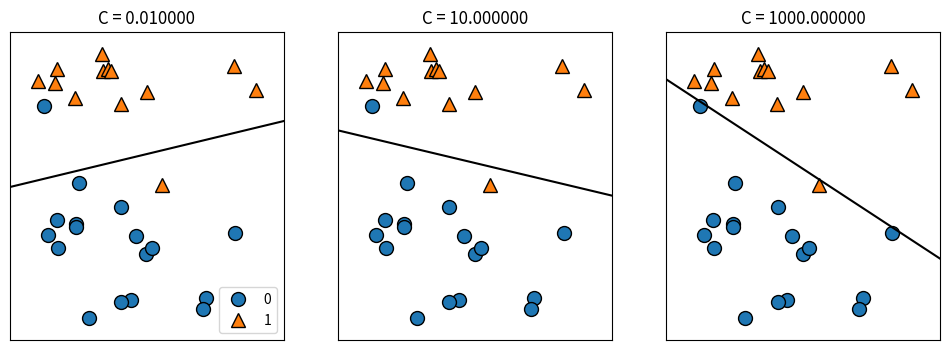

In [7]:
mglearn.plots.plot_linear_svc_regularization()

- 分類的線性模型在低維空間中可能看起來非常嚴格，只允許決策邊界是直線或平面。
- 在高維度中，用於分類的線性模型變得非常強大，並且在考慮更多特徵時，防止過度擬合變得越來越重要。

### 真偽預測和評估

stratify 參數的主要用途如下：

1. 維持類別分布的平衡  
確保分割後的訓練集和測試集中，各個類別的比例與原始數據集相同  
避免某些類別在分割後比例失衡的問題

2. 處理不平衡數據  
特別適用於處理類別不平衡的數據集  
例如：如果原始數據中正例與負例的比例是 8:2，分割後的訓練集和測試集也會保持這個比例  

3. 實際例子  
```
# 原始數據假設有100筆，正例:負例 = 80:20
# 使用 stratify=y 分割後：
# 訓練集(70筆)：正例:負例 = 56:14 (保持 8:2 的比例)
# 測試集(30筆)：正例:負例 = 24:6 (保持 8:2 的比例)
```

In [8]:
import mglearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# 1. 產生資料集並分割成訓練集和測試集
# random_state控制資料集分割的隨機性

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 2. 建立和訓練模型
# 使用LogisticRegression
#random_state控制模型訓練過程中的隨機性
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# 使用LinearSVC
svc_model = LinearSVC(random_state=42)
svc_model.fit(X_train, y_train)

# 3. 進行預測
log_pred = log_model.predict(X_test)
svc_pred = svc_model.predict(X_test)

# 4. 評估模型
print("邏輯迴歸模型評估:")
print("-" * 50)
print(f"準確度: {accuracy_score(y_test, log_pred):.3f}")
#print("\n分類報告:")
#print(classification_report(y_test, log_pred))

print("\nLinearSVC模型評估:")
print("-" * 50)
print(f"準確度: {accuracy_score(y_test, svc_pred):.3f}")
#print("\n分類報告:")
#print(classification_report(y_test, svc_pred))
print("="*50)
#============c設100================
log_model_100 = LogisticRegression(random_state=42,C=100)
log_model_100.fit(X_train, y_train)

# 使用LinearSVC
svc_model_100 = LinearSVC(random_state=42,C=100)
svc_model_100.fit(X_train, y_train)

# 3. 進行預測
log_pred_100 = log_model_100.predict(X_test)
svc_pred_100 = svc_model_100.predict(X_test)

# 4. 評估模型
print("邏輯迴歸模型評估C=100:")
print("-" * 50)
print(f"準確度: {accuracy_score(y_test, log_pred_100):.3f}")


print("\nLinearSVC模型評估C=100:")
print("-" * 50)
print(f"準確度: {accuracy_score(y_test, svc_pred_100):.3f}")


邏輯迴歸模型評估:
--------------------------------------------------
準確度: 0.875

LinearSVC模型評估:
--------------------------------------------------
準確度: 0.875
邏輯迴歸模型評估C=100:
--------------------------------------------------
準確度: 0.875

LinearSVC模型評估C=100:
--------------------------------------------------
準確度: 0.875
